# Stock Price Prediction Project

In [1]:
from platform import python_version
print(python_version())

3.9.12


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
 
import warnings
warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Importing Data

In [4]:
stock_df=pd.read_csv('Stock_Price_data_set.csv')

In [5]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


## Exploring Data

In [6]:
stock_df.shape

(1009, 7)

In [7]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [8]:
stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
stock_df.describe

<bound method NDFrame.describe of             Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

     

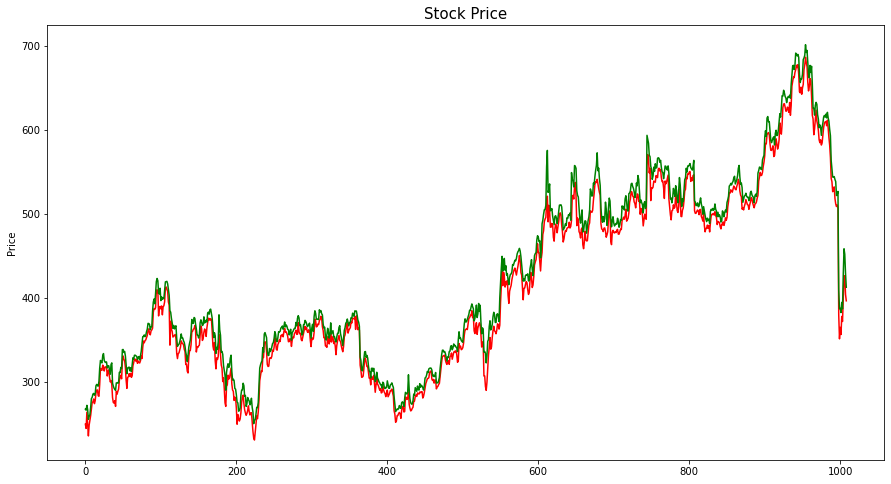

In [10]:
plt.figure(figsize=(15,8))
plt.plot(stock_df['Low'],color="red",label='Low')
plt.plot(stock_df['High'],color="green",label='High')
plt.title('Stock Price', fontsize=15)

plt.ylabel('Price')
plt.show()

## Missing Values

In [11]:
stock_df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

## Duplicates

In [12]:
stock_df.duplicated().sum()

0

## Column Data Type

In [13]:
stock_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Outliers

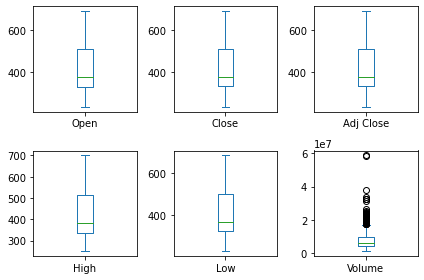

In [14]:
plt.subplot(2,3,1)
stock_df['Open'].plot(kind='box') 

plt.subplot(2,3,2)
stock_df['Close'].plot(kind='box')

plt.subplot(2,3,3)
stock_df['Adj Close'].plot(kind='box')

plt.subplot(2,3,4)
stock_df['High'].plot(kind='box')

plt.subplot(2,3,5)
stock_df['Low'].plot(kind='box')

plt.subplot(2,3,6)
stock_df['Volume'].plot(kind='box')

plt.tight_layout()

## ML MODELING

In [15]:
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [16]:
X = stock_df.iloc[:, 1:8]
X = pd.get_dummies(X)
X

,Open,High,Low,Close,Adj Close,Volume
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...
1004,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


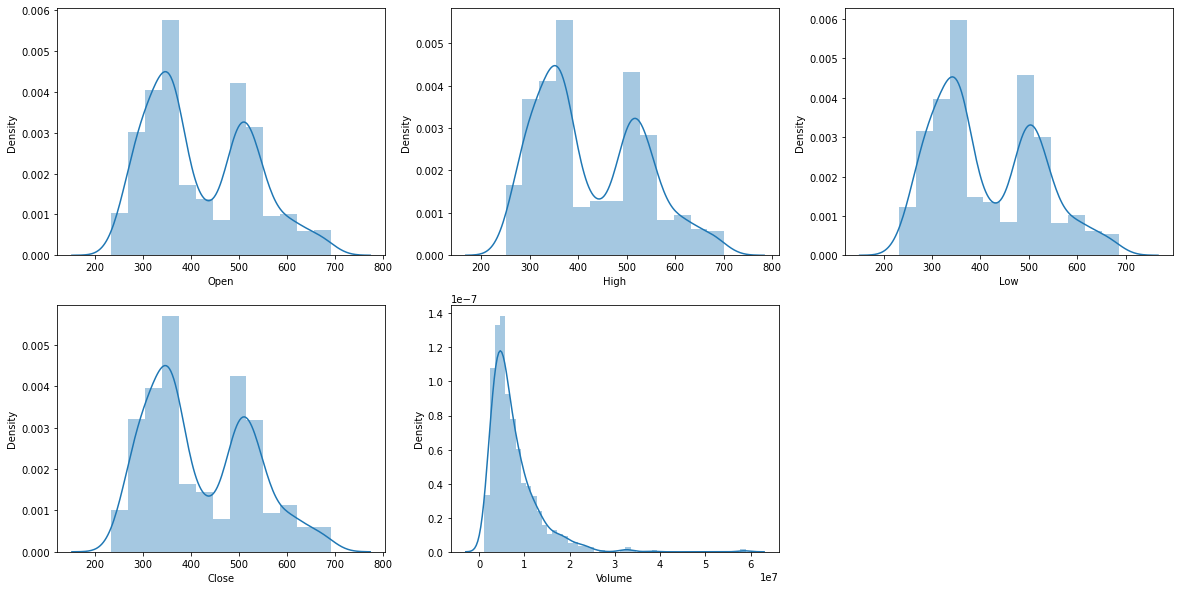

In [17]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(stock_df[col])
plt.show()

In [18]:
splitted = stock_df['Date'].str.split('-', expand=True)
 
stock_df['month'] = splitted[1].astype('int')
stock_df['year'] = splitted[0].astype('int')
stock_df['date'] = splitted[2].astype('int')
 
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,month,year,date
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,2018,5
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,2018,6
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,2018,7
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,2018,8
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2,2018,9


In [19]:
#columns_to_drop = [8,9,,17,18] 

stock_df.drop(stock_df.columns[0], axis=1, inplace=True)

In [20]:
stock_df['is_quarter_end'] = np.where(stock_df['month']%3==0,1,0)
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,month,year,date,is_quarter_end
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2,2018,5,0
1,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2,2018,6,0
2,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2,2018,7,0
3,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2,2018,8,0
4,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2,2018,9,0


In [21]:
df=stock_df

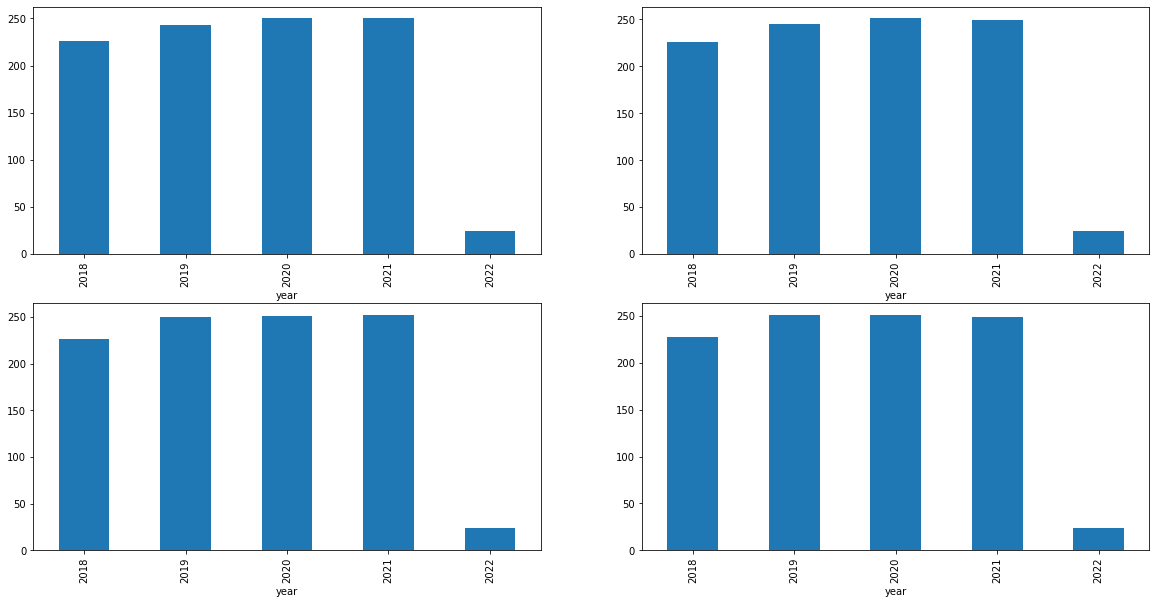

In [22]:
data_grouped = df.groupby('year').nunique()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [23]:
df.groupby('is_quarter_end').nunique()

,Open,High,Low,Close,Adj Close,Volume,month,year,date
is_quarter_end,,,,,,,,,
0,652,659,660,663,663,671,8,5,31
1,333,333,336,335,335,337,4,4,31


In [24]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

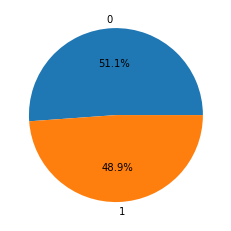

In [25]:
plt.pie(df['target'].value_counts().values,labels=[0, 1], autopct='%1.1f%%')
plt.show()

### Correlation

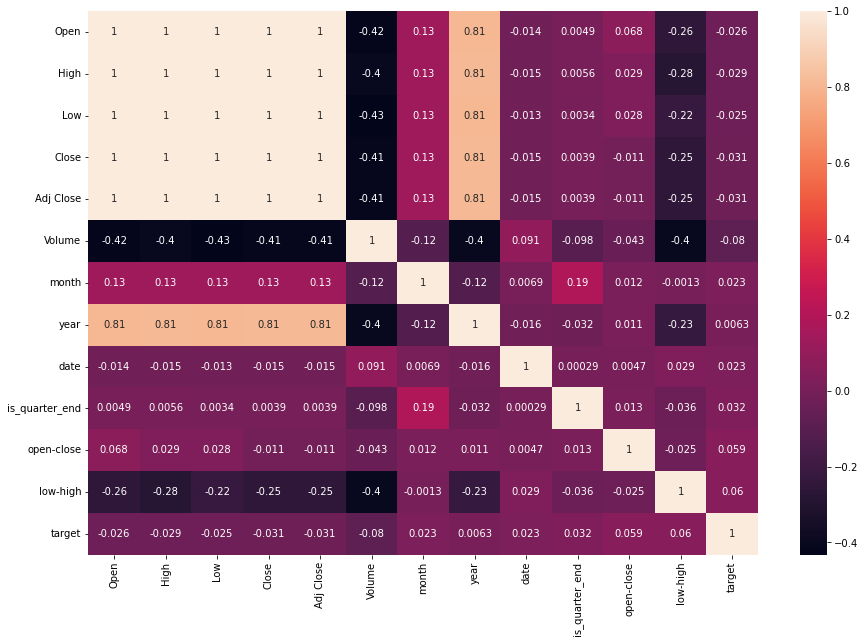

In [26]:
plt.figure(figsize=(15, 10))
sb.heatmap(df.corr(), annot=True)
plt.show()

## DATA SPLITTING AND NORMALISING

In [27]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len
training_data_len

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [28]:
train_data=scaled_data[0:training_data_len,:]
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [29]:
x_train,y_train=np.array(x_train),np.array(y_train)

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 39s 44ms/step - loss: 0.0030


In [32]:
test_data=scaled_data[training_data_len-60:,:]

x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [33]:
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [34]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

7/7 [==============================] - 2s 27ms/step
[[557.6392 ]
 [549.75806]
 [541.7546 ]
 [535.6243 ]
 [530.45264]
 [526.66516]
 [524.43353]
 [523.90717]
 [523.5192 ]
 [522.36304]
 [519.96063]
 [517.9164 ]
 [516.9474 ]
 [513.9063 ]
 [511.78137]
 [508.73166]
 [506.0255 ]
 [504.86993]
 [503.84256]
 [502.6372 ]
 [501.75018]
 [503.26666]
 [504.96756]
 [507.3067 ]
 [509.31207]
 [511.03778]
 [512.60187]
 [513.68494]
 [513.8176 ]
 [513.54706]
 [511.608  ]
 [510.0841 ]
 [508.91052]
 [507.7187 ]
 [505.69455]
 [503.85892]
 [502.59146]
 [503.471  ]
 [503.8916 ]
 [504.18658]
 [505.28983]
 [506.93182]
 [507.98312]
 [510.46793]
 [513.7624 ]
 [517.7484 ]
 [522.8324 ]
 [528.5385 ]
 [533.7297 ]
 [537.10754]
 [540.0494 ]
 [542.39   ]
 [545.3186 ]
 [547.1422 ]
 [547.4518 ]
 [547.9041 ]
 [548.5268 ]
 [549.66766]
 [552.0008 ]
 [553.702  ]
 [552.95294]
 [551.64026]
 [550.0569 ]
 [545.8787 ]
 [541.011  ]
 [537.1184 ]
 [534.37085]
 [532.9157 ]
 [532.3046 ]
 [531.38116]
 [531.0094 ]
 [530.5328 ]
 [529.42084]

In [35]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

17.51605404592273

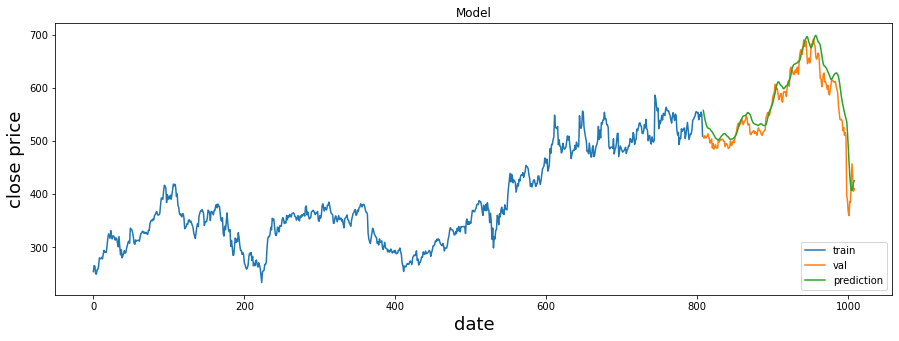

In [36]:

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions

plt.figure(figsize=(15,5))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','prediction'],loc='lower right')
plt.show()

Here the **Green line** depict Predicted values where as **Yellow line** depicts the actual value. 

In [37]:
valid

,Close,predictions
808,508.779999,557.639221
809,505.549988,549.758057
810,510.299988,541.754578
811,505.549988,535.624329
812,506.519989,530.452637
...,...,...
1004,427.140015,407.326599
1005,457.130005,406.656616
1006,429.480011,415.308014
1007,405.600006,422.835236


We can observe that the accuracy achieved by the ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market Price prediction.